### Cervical Cancer Risk Factors for Biopsy

This data file used in this notebook contains a list of risk factors for cervical cancer leading to a Biopsy examination. 
The original data file and more information can be found here:
https://www.kaggle.com/loveall/cervical-cancer-risk-classification

This notebook illustrates the first steps of the data analysis, which are *data observation* and *data preprocessing*. Here the main task consistes in replacing the incomplete or missing information (represented by '?') by a reasonable guess.

*This notebook has been built from this one:* https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models

### Important
You have to install the package `seaborn` before you can use the following notebook:
`conda install -y seaborn`

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Data observation

Here **observation** means to see the type and structure of the data or whether there are missing values. Let's import the data.

In [2]:
risk_factors = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

print(risk_factors.keys())
print()
print(risk_factors.info())
risk_factors

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In the output above we observe that there are some missing values named as '?', which made the whole column become an object. To do further computation, we have to replace '?' with `nan`, turn the object type to numeric type and replace the missing value by a reasonable guess. For numerical types we use the median for categorial we use 1.

# 2. Data-preprocessing

In [3]:
#loop over all keys of data
for keys in risk_factors.keys():   
    #replace the missing data '?' by nan (not a number)
    risk_factors[keys] = risk_factors[keys].replace('?', np.nan)
    #now we can transform to a numerical value
    risk_factors[keys] = pd.to_numeric(risk_factors[keys])
    
    #if the maximum of the column is equal to one, ...
    h_arr = np.array(risk_factors[keys])
    if np.max(h_arr[~np.isnan(h_arr)]) == 1:
        #... we assue a categorical (0/1) column and replace by 1
        val = 1
    else:
        #Else we assume a numerical value and replace by the median
        val = np.median(h_arr[~np.isnan(h_arr)])
        
    #here the actual replacement happens
    risk_factors[keys] = risk_factors[keys].fillna(val)
    

risk_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

Now, we have full data 'risk_factors' for computation.<br/>

## Data set description

In [4]:
risk_factors.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.158508,1.201241,0.446278,0.686480,2.035331,0.233100,...,4.177156,3.233100,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.365430,4.060623,2.210351,0.464194,3.567040,0.423052,...,1.785156,1.818927,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Plot some of the risk factors. 

<AxesSubplot:xlabel='STDs (number)', ylabel='count'>

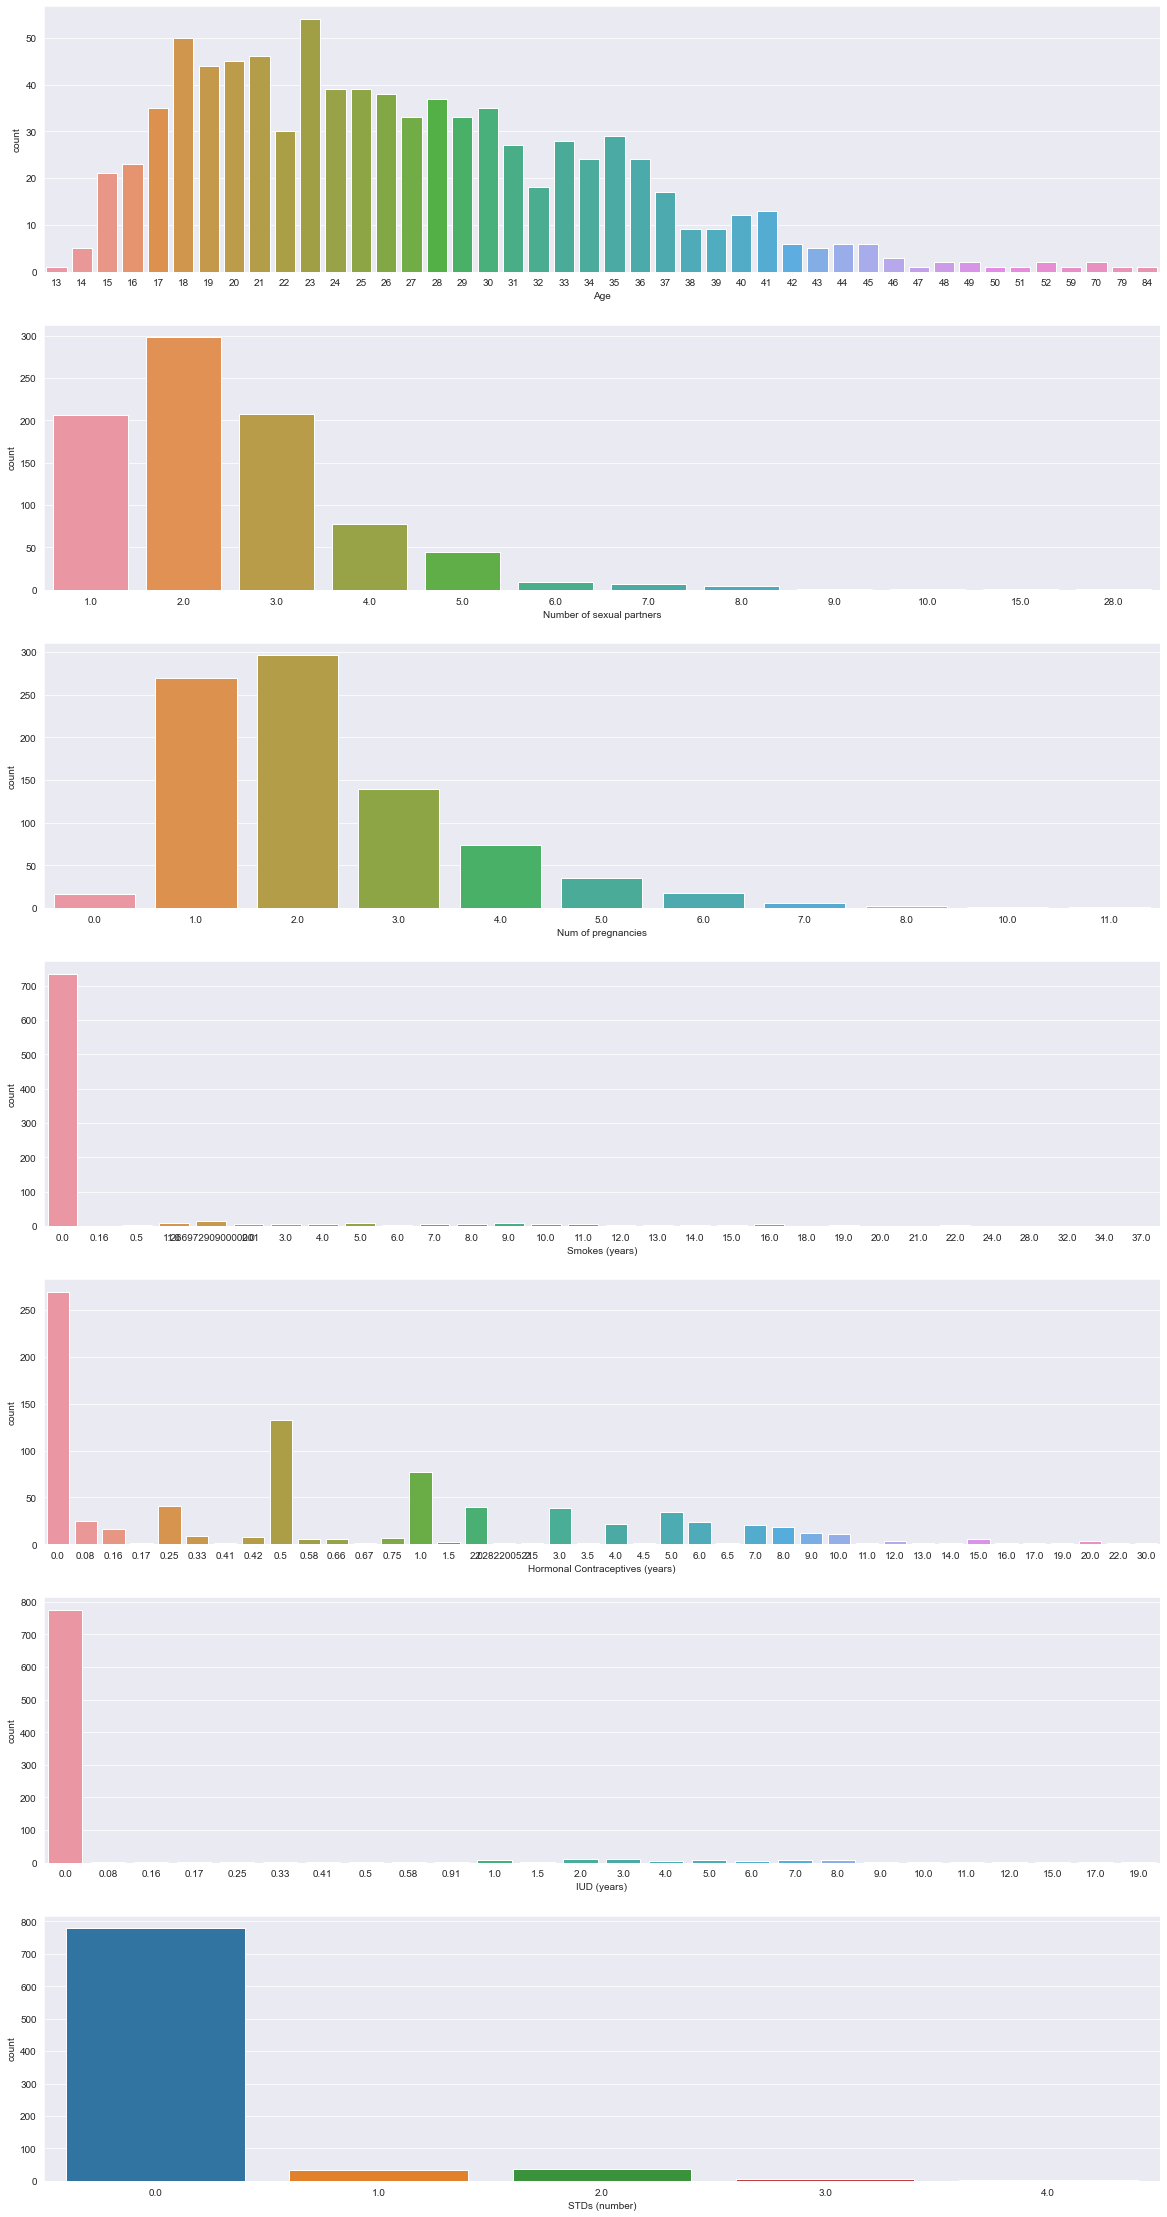

In [5]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=risk_factors, ax=ax1)
sns.countplot(x='Number of sexual partners', data=risk_factors, ax=ax2)
sns.countplot(x='Num of pregnancies', data=risk_factors, ax=ax3)
sns.countplot(x='Smokes (years)', data=risk_factors, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=risk_factors, ax=ax5)
sns.countplot(x='IUD (years)', data=risk_factors, ax=ax6)
sns.countplot(x='STDs (number)', data=risk_factors, ax=ax7)

#### Only relevant for the following is the column 'Biopsy', which indicates 'healthy' = 0 or 'sick' = 1

<AxesSubplot:xlabel='Biopsy', ylabel='count'>

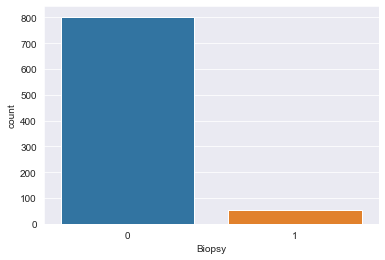

In [6]:
sns.countplot(x='Biopsy', data=risk_factors)

### Inspecting the priors
Now inspect the targets which is the result of the biopsy. Compute below the priors of sick (1) vs healthy patients (0).

In [8]:
targets = np.array(risk_factors['Biopsy'])

### START Your code here

p_healthy = (targets == 0).sum() / targets.shape[0]
p_sick = (targets == 1).sum() / targets.shape[0]


### END Your code here

print('Prior for healthy = ', p_healthy)
print('Prior for sick    = ', p_sick)

Prior for healthy =  0.9358974358974359
Prior for sick    =  0.0641025641025641


**What is your observation about this dataset?** 

We notice that a priori we have more chance to be healthy than to be sick. The dataset is therefore unbalanced.


Let's assume know 3 teams A, B and C fight on Kaggle on this task and report their results on an independent test set (with n_test = 300).
 - Team A: 91.3% overall accuracy
 - Team B: 93.5% overall accuracy
 - Team C: 97.2% overall accuracy

**Which system would you buy?** 

System C has the highest overall accuracy and therefore seems the best. However, to make a better decision it would be interesting to have other information available such as precision and recall. In our case we will prefer to have a classifier with low precision but high recall, to be sure to detect sick people. A good metric to analyze would be the F1 score.

**What would you need to take a better decision?** 

The likelihood should be calculated for each feature. That is to say probability of observing x given class j. With the likehood and the posterior probability it will be possible to calculate the proba a posteriori. 